# État de la plateforme 

Il est important d'avoir un oeil sur l'évolution de l'édition générale de la plateforme. Pour ce faire, nous nous baserons essentiellement sur l'état des livres pour cela. 

In [1]:
import json
import requests
import csv
import pandas as pd
import datetime
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('dump_api.json', 'r') as f: 
    data = json.loads(f.read())

Ici, les données dont nous avons besoin sont un peu différentes. Affichons, toujours dans un dataframe : 

- id
- url 
- livre 
- nombre de textes 
- nombre de mots clés 
- nombre de commentaires 

In [3]:
df = pd.DataFrame(columns=['epi_id', 'epi_url', 'livre', 'nbr_txts', 'nbr_kw', 'nbr_coms'])

In [4]:
data_list = []

for item in data:
    books = item['book']
    texts = item['texts']
    keywords = item['keywords']
    comments = item['comments']
    data_list.append({
        'epi_id': item['id'],
        'epi_url': item['url'],
        'livre': books['number'],
        'nbr_txts': len(texts),
        'nbr_kw': len(keywords),
        'nbr_coms': len(comments)
    })

df = pd.DataFrame(data_list)
pd.set_option('display.max_colwidth', None)

In [5]:
df.sample(5)

,epi_id,epi_url,livre,nbr_txts,nbr_kw,nbr_coms
2966,3044,https://anthologiagraeca.org/api/passages/urn:cts:greekLit:tlg7000.tlg001.ag:11.166/,11,3,0,0
975,238,https://anthologiagraeca.org/api/passages/urn:cts:greekLit:tlg7000.tlg001.ag:7.147/,7,4,10,0
1124,586,https://anthologiagraeca.org/api/passages/urn:cts:greekLit:tlg7000.tlg001.ag:7.295/,7,4,6,0
3855,3780,https://anthologiagraeca.org/api/passages/urn:cts:greekLit:tlg7000.tlg001.ag:16.111/,16,1,0,1
761,1768,https://anthologiagraeca.org/api/passages/urn:cts:greekLit:tlg7000.tlg001.ag:6.294/,6,3,1,0


In [6]:
df.describe().loc[['count','max']]

,epi_id,livre,nbr_txts,nbr_kw,nbr_coms
count,4134.0,4134.0,4134.0,4134.0,4134.0
max,4134.0,16.0,11.0,53.0,34.0


La fonction ```describe``` utilisée ci-dessous nous permet de mettre en évidence quelques statistiques intéressantes, plus particulièrement d'afficher les plus hautes valeurs pour chacune des colonnes. Certains épigrammes ont 11 textes, d'autres 53 mots clés, ou 34 commentaires ! Nous pouvons créer des filtres pour voir de quelles épigrammes il s'agit : 

In [7]:
max_txt_filter = df['nbr_txts'] == 11
max_kw_filter = df['nbr_kw'] == 53
max_coms_filter = df['nbr_coms'] == 34

In [8]:
df[max_txt_filter]

,epi_id,epi_url,livre,nbr_txts,nbr_kw,nbr_coms
1912,2433,https://anthologiagraeca.org/api/passages/urn:cts:greekLit:tlg7000.tlg001.ag:9.70/,9,11,0,0


In [9]:
df[max_kw_filter]

,epi_id,epi_url,livre,nbr_txts,nbr_kw,nbr_coms
152,2,https://anthologiagraeca.org/api/passages/urn:cts:greekLit:tlg7000.tlg001.ag:4.1/,4,6,53,34


In [10]:
df[max_coms_filter]

,epi_id,epi_url,livre,nbr_txts,nbr_kw,nbr_coms
152,2,https://anthologiagraeca.org/api/passages/urn:cts:greekLit:tlg7000.tlg001.ag:4.1/,4,6,53,34


Mais le but de notre expérience est de visualiser nos données. Visualisons -- toujours avec ```Pandas``` dans un premier temps --, pour les textes, mots-clés, et commentaires, les données suivantes : 

- nombre d'items par livre 
- nombre moyen d'items par épigramme (selon les livres) 
- médiane des items par épigramme (selon les livres) 

## Textes 

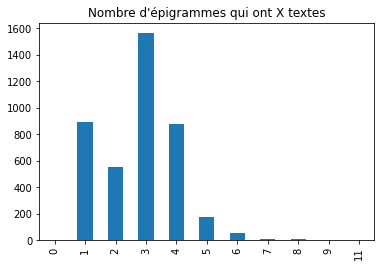

In [11]:
counts = df['nbr_txts'].value_counts().sort_index()

plt.figure()
counts.plot(kind='bar')
plt.title("Nombre d'épigrammes qui ont X textes")


plt.show()


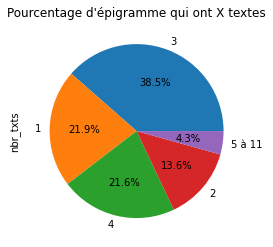

In [12]:
counts = df['nbr_txts'].value_counts()

# Calculer la somme totale des valeurs
total = counts.sum()

# Identifier les valeurs qui ont moins de 4% par rapport à la somme totale
threshold = 0.04  # Seuil de 4% (modifiable selon vos besoins)
small_values = counts[counts/total < threshold]

# Regrouper les petites valeurs sous la catégorie "Autre"
counts_grouped = counts.copy()
counts_grouped.loc[small_values.index] = counts_grouped.loc[small_values.index].sum()
counts_grouped = counts_grouped[~(counts_grouped/total < threshold)]  # Supprimer les petites valeurs individuelles

# Mettre à jour le libellé correspondant à "5"
counts_grouped.index = counts_grouped.index.map(lambda x: '5 à 11' if x == 5 else x)

# Tracer le graphique en secteurs avec les valeurs regroupées
plt.figure()
counts_grouped.plot(kind='pie', autopct='%1.1f%%')
plt.title("Pourcentage d'épigramme qui ont X textes")

plt.show()


<Figure size 432x288 with 0 Axes>

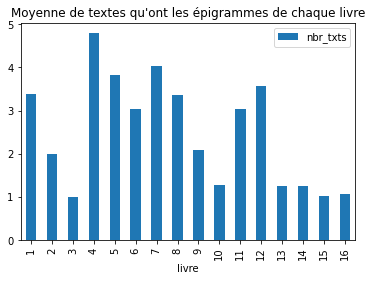

In [13]:
# Calculer la moyenne des valeurs par groupe 'livre'
mean_values = df[['livre', 'nbr_txts']].groupby('livre').mean()

# Réorganiser les données selon l'ordre souhaité (de 1 à 16)
mean_values_ordered = mean_values.reindex(range(1, 17))

# Tracer le bar plot ordonné
plt.figure()
mean_values_ordered.plot(kind='bar')
plt.title("Moyenne de textes qu'ont les épigrammes de chaque livre")

plt.show()


## Mots-clés

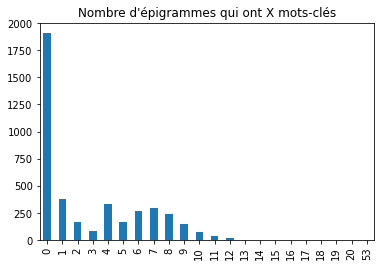

In [14]:
# Compter le nombre d'occurrences de chaque valeur de "nbr_kw" et trier par ordre croissant des mots-clés
counts = df['nbr_kw'].value_counts().sort_index()

# Tracer le bar plot ordonné
plt.figure()
counts.plot(kind='bar')
plt.title("Nombre d'épigrammes qui ont X mots-clés")

plt.show()

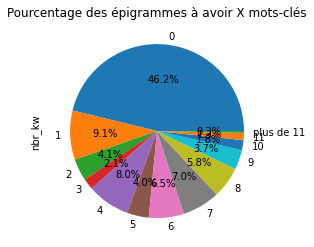

In [15]:
import matplotlib.pyplot as plt

# Regroupement des valeurs selon les catégories spécifiées
grouped_counts = df['nbr_kw'].value_counts().sort_index()
grouped_counts = grouped_counts.groupby(pd.cut(grouped_counts.index,
                                               bins=[0,1,2,3,4,5,6,7,8,9,10,11,13,53],
                                               labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', 'plus de 11'],
                                               right=False)).sum()

# Tracer la pie chart avec les valeurs groupées
plt.figure()
grouped_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Pourcentage des épigrammes à avoir X mots-clés")

plt.show()


<Figure size 432x288 with 0 Axes>

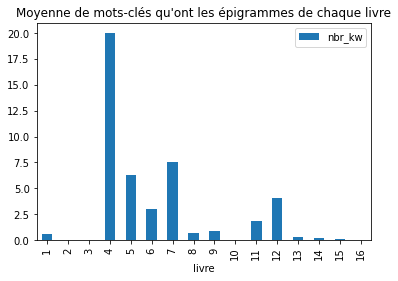

In [16]:
# Calculer la moyenne des valeurs par groupe 'livre'
mean_values = df[['livre', 'nbr_kw']].groupby('livre').mean()

# Réorganiser les données selon l'ordre souhaité (de 1 à 16)
mean_values_ordered = mean_values.reindex(range(1, 17))

# Tracer le bar plot ordonné
plt.figure()
mean_values_ordered.plot(kind='bar')
plt.title("Moyenne de mots-clés qu'ont les épigrammes de chaque livre")

plt.show()


## Commentaires

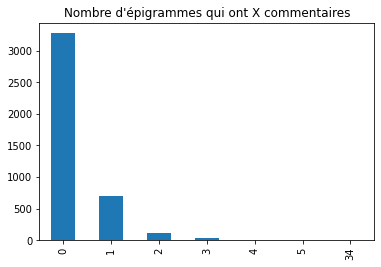

In [17]:
# Compter le nombre d'occurrences de chaque valeur de "nbr_kw" et trier par ordre croissant des mots-clés
counts = df['nbr_coms'].value_counts().sort_index()

# Tracer le bar plot ordonné
plt.figure()
counts.plot(kind='bar')
plt.title("Nombre d'épigrammes qui ont X commentaires")

plt.show()

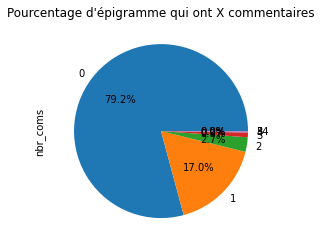

In [18]:
# Compter le nombre d'occurrences de chaque valeur de "nbr_coms"
counts = df['nbr_coms'].value_counts()

# Calculer la somme totale des valeurs
total = counts.sum()

# Tracer le graphique en secteurs avec les valeurs regroupées
plt.figure()
counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Pourcentage d'épigramme qui ont X commentaires")

plt.show()


<Figure size 432x288 with 0 Axes>

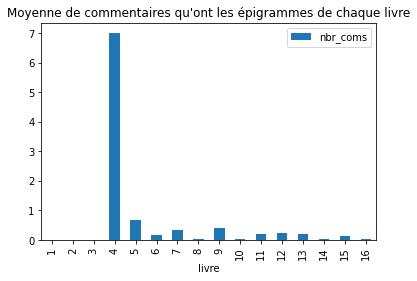

In [19]:
# Calculer la moyenne des valeurs par groupe 'livre'
mean_values = df[['livre', 'nbr_coms']].groupby('livre').mean()

# Réorganiser les données selon l'ordre souhaité (de 1 à 16)
mean_values_ordered = mean_values.reindex(range(1, 17))

# Tracer le bar plot ordonné
plt.figure()
mean_values_ordered.plot(kind='bar')
plt.title("Moyenne de commentaires qu'ont les épigrammes de chaque livre")

plt.show()


## L'ensemble

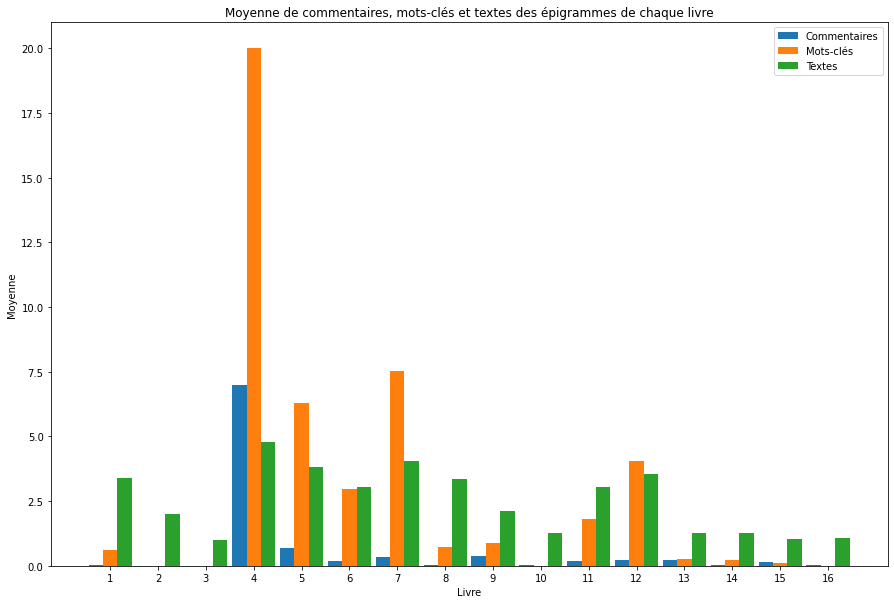

In [20]:
# Données 
livres = range(1, 17)
mean_values_coms = df[['livre', 'nbr_coms']].groupby('livre').mean()
mean_values_coms_ordered = mean_values_coms.reindex(range(1, 17))

mean_values_kw = df[['livre', 'nbr_kw']].groupby('livre').mean()
mean_values_kw_ordered = mean_values_kw.reindex(range(1, 17))

mean_values_txts = df[['livre', 'nbr_txts']].groupby('livre').mean()
mean_values_txts_ordered = mean_values_txts.reindex(range(1, 17))

# Largeur des barres
bar_width = 0.3

# Position des barres pour chaque catégorie
positions_coms = np.arange(len(livres))
positions_kw = positions_coms + bar_width
positions_txts = positions_kw + bar_width

# Création de la figure et des axes
fig, ax = plt.subplots(figsize=(15, 10))

# Tracer les barres pour chaque catégorie
ax.bar(positions_coms, mean_values_coms_ordered['nbr_coms'].values, width=bar_width, label='Commentaires')
ax.bar(positions_kw, mean_values_kw_ordered['nbr_kw'].values, width=bar_width, label='Mots-clés')
ax.bar(positions_txts, mean_values_txts_ordered['nbr_txts'].values, width=bar_width, label='Textes')

# Étiquettes des axes et titre
ax.set_xlabel('Livre')
ax.set_ylabel('Moyenne')
ax.set_title('Moyenne de commentaires, mots-clés et textes des épigrammes de chaque livre')

# Étiquettes des livres sur l'axe des x
ax.set_xticks(positions_kw)
ax.set_xticklabels(livres)

# Légende
ax.legend()

# Afficher le graphique
plt.show()
